In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
df = pd.read_csv("C:/Users/Roopa/Downloads/IN_youtube_trending_data.csv/IN_youtube_trending_data.csv")
df.head()


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [59]:
import re
k = open("C:/Users/Roopa/Downloads/IN_category_id.json").read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i+1:Category_list[i] for i in range(len(Category_list))}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 3: 'Music',
 4: 'Pets & Animals',
 5: 'Sports',
 6: 'Short Movies',
 7: 'Travel & Events',
 8: 'Gaming',
 9: 'Videoblogging',
 10: 'People & Blogs',
 11: 'Comedy',
 12: 'Entertainment',
 13: 'News & Politics',
 14: 'Howto & Style',
 15: 'Education',
 16: 'Science & Technology',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251277 entries, 0 to 251276
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           251277 non-null  object
 1   title              251277 non-null  object
 2   publishedAt        251277 non-null  object
 3   channelId          251277 non-null  object
 4   channelTitle       251276 non-null  object
 5   categoryId         251277 non-null  int64 
 6   trending_date      251277 non-null  object
 7   tags               251277 non-null  object
 8   view_count         251277 non-null  int64 
 9   likes              251277 non-null  int64 
 10  dislikes           251277 non-null  int64 
 11  comment_count      251277 non-null  int64 
 12  thumbnail_link     251277 non-null  object
 13  comments_disabled  251277 non-null  bool  
 14  ratings_disabled   251277 non-null  bool  
 15  description        231822 non-null  object
dtypes: bool(2), int64(5)

In [61]:
df.video_id.nunique()

78847

In [62]:
df.drop(["channelId","thumbnail_link","ratings_disabled","comments_disabled","description","tags"], inplace=True, axis=1)

In [63]:
df_maxViews = df.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
df_maxViews.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
52057,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-05-30T00:00:00Z,264407389,16021542,150990,6738565
3619,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-30T00:00:00Z,253995993,16115240,756696,6249727
64049,DUwlGduupRI,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,2021-07-06T09:30:02Z,DM - Desi Melodies,10,2021-07-16T00:00:00Z,202091414,3997842,122432,327015
143385,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,BLACKPINK,10,2022-08-25T00:00:00Z,187922090,11640133,0,3160681
4735,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,10,2020-09-05T00:00:00Z,184778248,11795683,879354,2736021


In [64]:
df_minViews = df.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
7117,XsM2Fi8J4zw,FULL MATCH - Roman Reigns vs. Baron Corbin – U...,2020-09-17T15:00:09Z,WWE,17,2020-09-18T00:00:00Z,1873305,48155,2269,1771
176061,6N4OtaZwq1c,#Mounaragam അമ്മ വരാത്ത സങ്കടത്തിൽ കിരൺ...,2023-02-14T15:31:50Z,Asianet,24,2023-02-15T00:00:00Z,367172,4408,0,47
209696,NrrhpjnSZwE,Apple iPhone 15 Series will be Different !,2023-08-19T02:30:16Z,Tech Burner,28,2023-08-19T00:00:00Z,507726,41967,0,712
245431,wR88YJqdy7k,I Organised YOUTUBER OLYMPICS & Winner gets a ...,2024-03-10T07:31:00Z,Fukra Insaan,24,2024-03-11T00:00:00Z,3426067,337283,0,13347
180205,EswCyIewM04,பட்டுனு அடிச்சா... பொட்டுனு போயிருவ... 😎| Tham...,2023-03-09T13:32:05Z,Vijay Television,24,2023-03-10T00:00:00Z,787791,11173,0,202


In [65]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())

In [69]:
def fetch_video_category(value):
    return categories.get(value, "Unknown")  # default to "Unknown" if categoryId not found

df_maxViews["Video_Category"] = df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"] = df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"] = df.categoryId.apply(fetch_video_category)
df.head()


,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,9885899,224925,3979409,350210,Entertainment
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,11308046,655450,33242,405146,Music
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,10,2020-08-12T00:00:00Z,9140911,296533,6179,30058,Music
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,T-Series,10,2020-08-12T00:00:00Z,23564512,743931,84162,136942,Music
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,VYRLOriginals,10,2020-08-12T00:00:00Z,6783649,268817,8798,22984,Music


In [70]:
df.Video_Category.value_counts()

Video_Category
Entertainment            98264
People & Blogs           41079
Music                    32609
Comedy                   18155
Gaming                   14735
Howto & Style             8065
Science & Technology      7566
News & Politics           7543
Sports                    7306
Film & Animation          6491
Education                 5955
Unknown                   1712
Autos & Vehicles          1597
Pets & Animals             110
Nonprofits & Activism       90
Name: count, dtype: int64

In [ ]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes


df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Autos & Vehicles,506134619,22234857,407200
1,Comedy,11678404033,763216038,7348410
2,Education,2646762808,152908556,1468695
3,Entertainment,76095174420,2769602090,48974942
4,Film & Animation,6158230924,159108955,3239950
5,Gaming,7845766555,617373581,4342309
6,Howto & Style,3270067108,163062573,1975857
7,Music,41199739864,1829824265,31857059
8,News & Politics,2539139941,44581193,3136659
9,Nonprofits & Activism,26835186,1682929,13501


Text(0, 0.5, 'View Count')

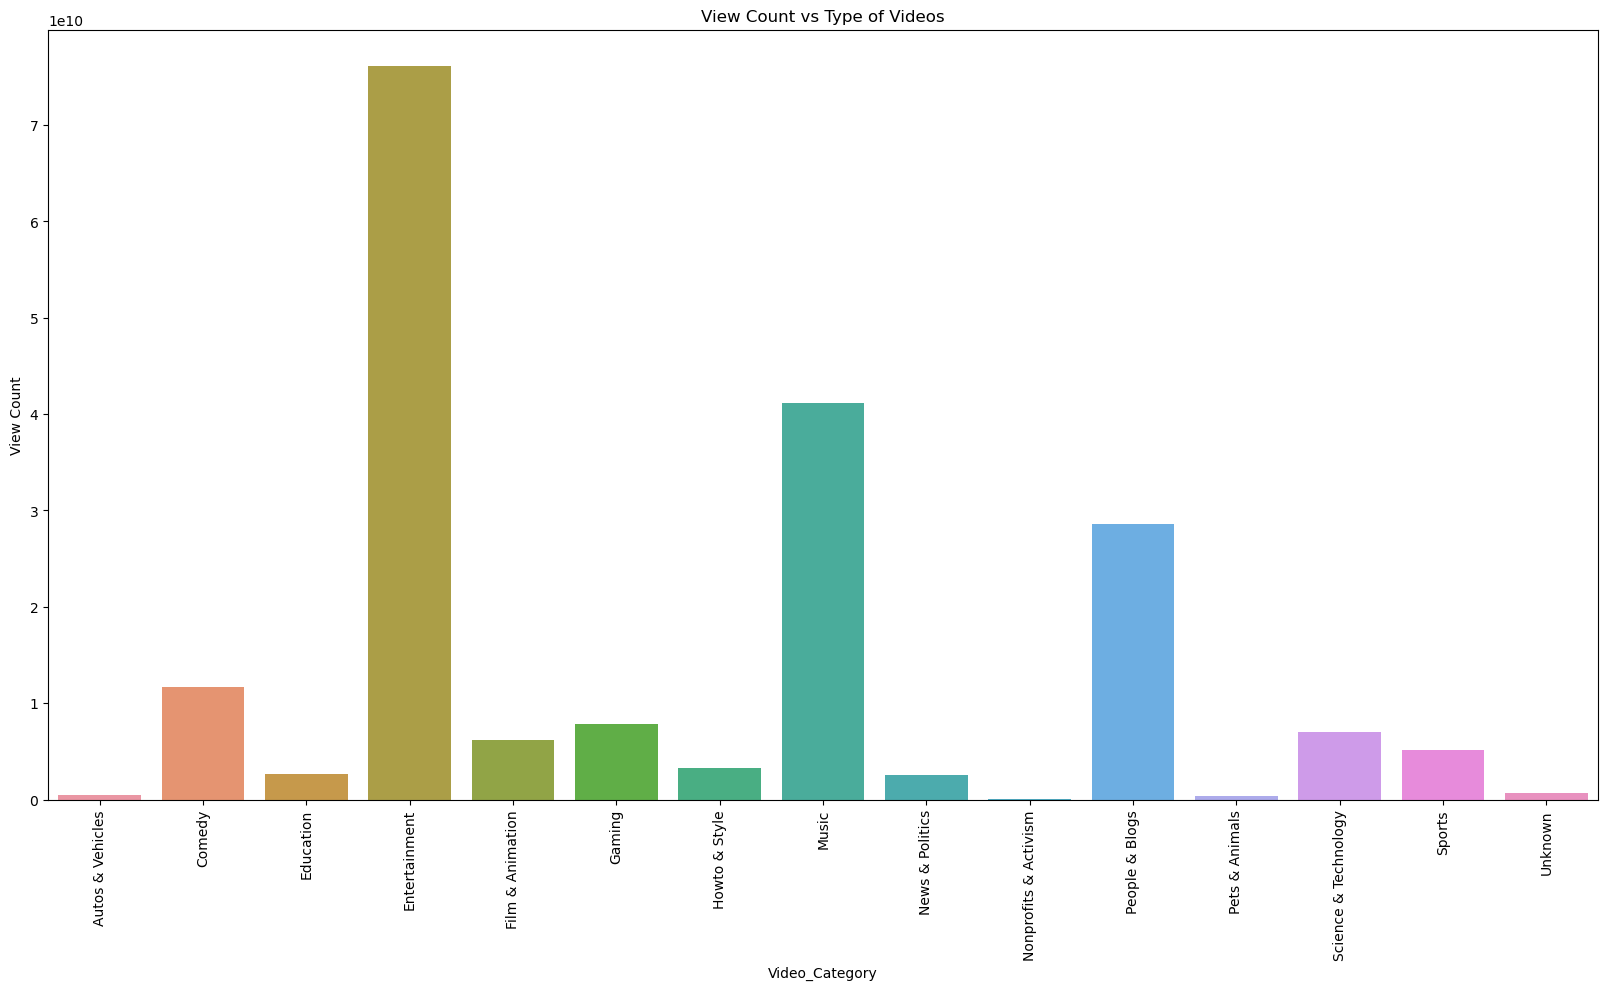

In [82]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("View Count vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.view_count)

# Add label for vertical axis
plt.ylabel("View Count")


In [83]:
df_Views_Analysis["Response_Percentage"] = ( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) * 100 /df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Autos & Vehicles,506134619,22234857,407200,4.473525
1,Comedy,11678404033,763216038,7348410,6.598200
2,Education,2646762808,152908556,1468695,5.832682
3,Entertainment,76095174420,2769602090,48974942,3.704015
4,Film & Animation,6158230924,159108955,3239950,2.636291
5,Gaming,7845766555,617373581,4342309,7.924221
6,Howto & Style,3270067108,163062573,1975857,5.046943
7,Music,41199739864,1829824265,31857059,4.518673
8,News & Politics,2539139941,44581193,3136659,1.879292
9,Nonprofits & Activism,26835186,1682929,13501,6.321663


Text(0, 0.5, 'Public Response(in percentage)')

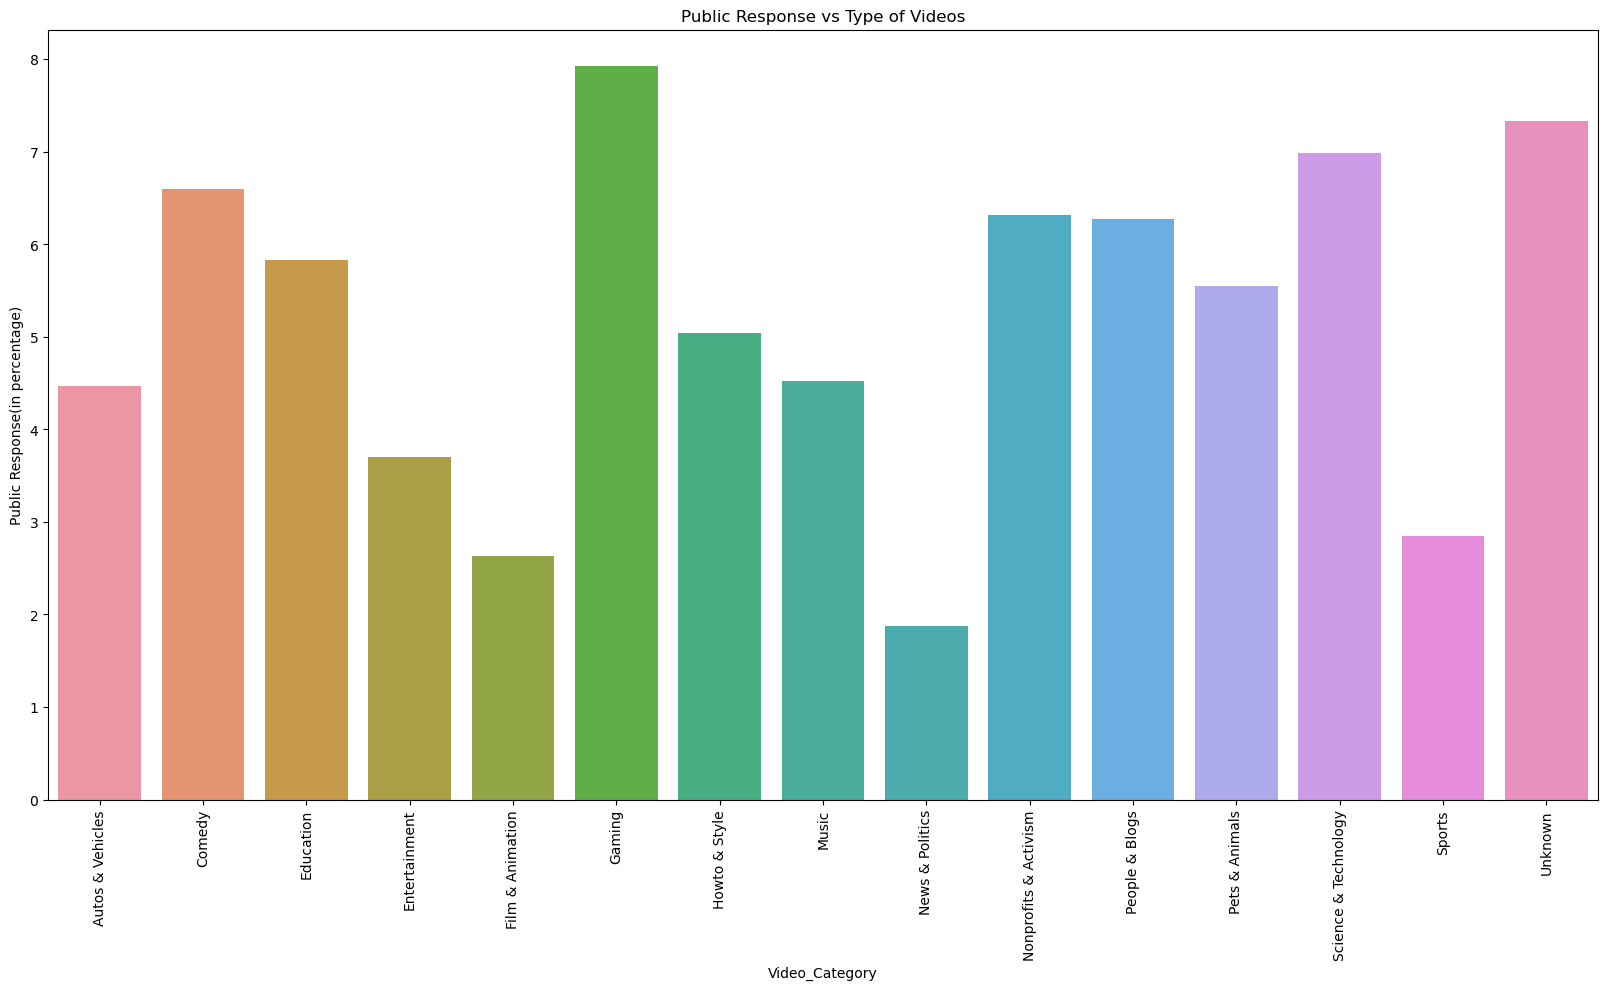

In [84]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

In [102]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis


,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Autos & Vehicles,506134619,22234857,407200,4.473525,4.393072,0.080453,544479,0.107576
1,Comedy,11678404033,763216038,7348410,6.598200,6.535277,0.062923,21623882,0.185161
2,Education,2646762808,152908556,1468695,5.832682,5.777192,0.055490,6083258,0.229838
3,Entertainment,76095174420,2769602090,48974942,3.704015,3.639655,0.064360,91658866,0.120453
4,Film & Animation,6158230924,159108955,3239950,2.636291,2.583680,0.052612,7801747,0.126688
5,Gaming,7845766555,617373581,4342309,7.924221,7.868875,0.055346,28919248,0.368597
6,Howto & Style,3270067108,163062573,1975857,5.046943,4.986521,0.060423,4230468,0.129369
7,Music,41199739864,1829824265,31857059,4.518673,4.441349,0.077323,198923616,0.482827
8,News & Politics,2539139941,44581193,3136659,1.879292,1.755760,0.123532,4522897,0.178127
9,Nonprofits & Activism,26835186,1682929,13501,6.321663,6.271352,0.050311,33118,0.123413


<Axes: xlabel='Video_Category'>

<Figure size 2000x1000 with 0 Axes>

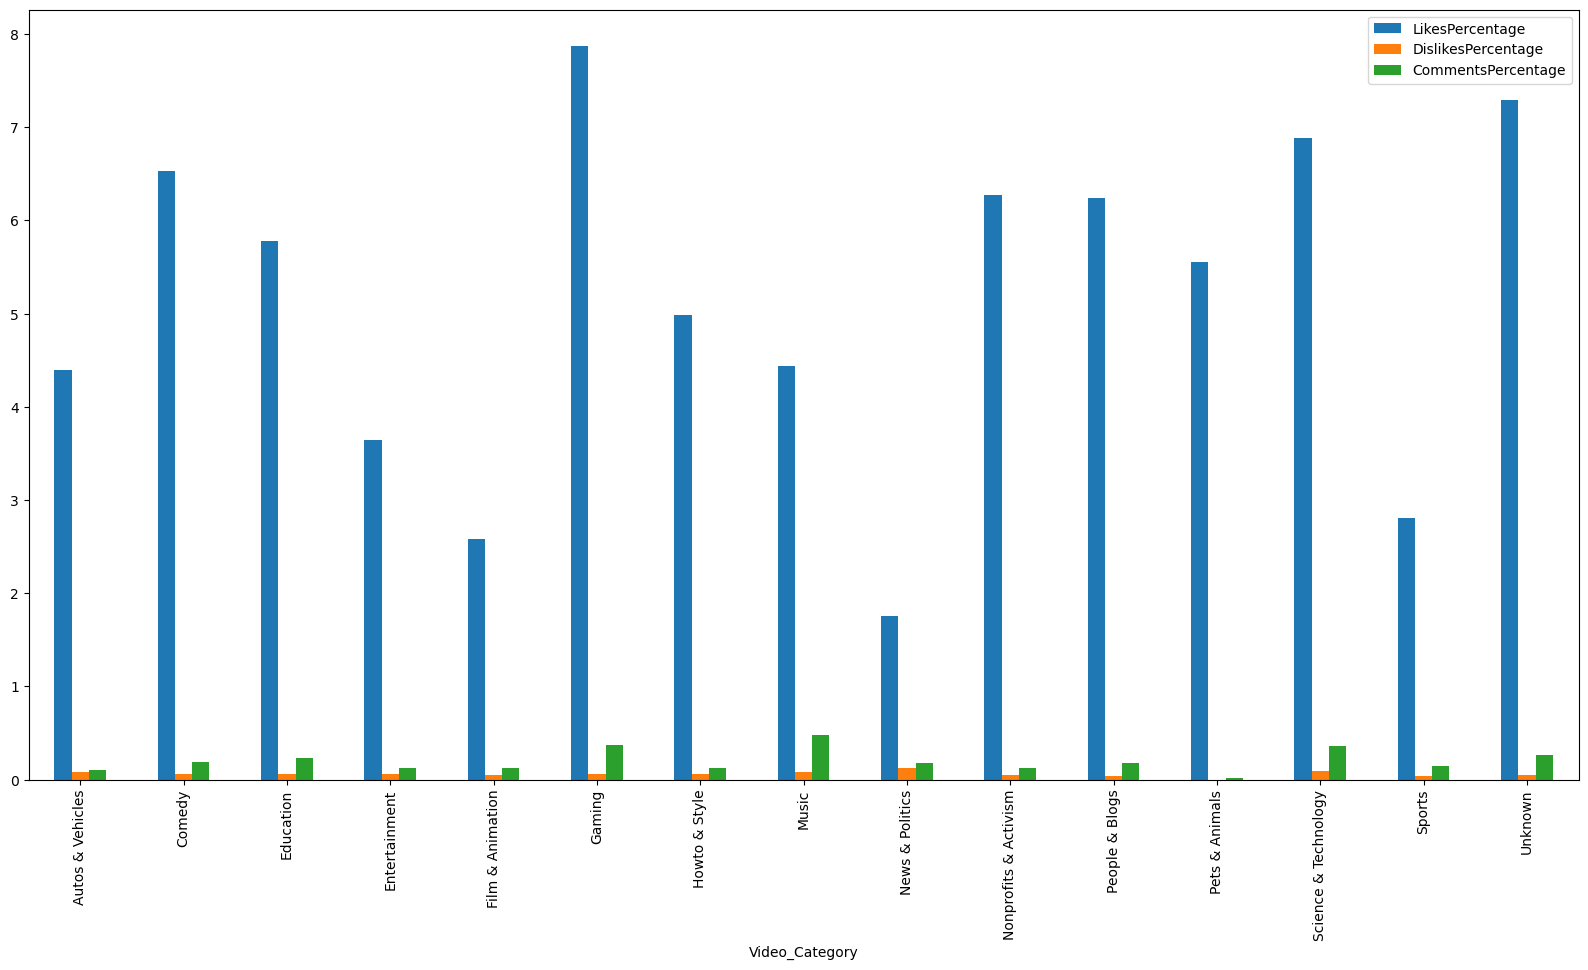

In [103]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_Views_Analysis.plot(x="Video_Category", y=["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind="bar",figsize=(20,10))

Text(0, 0.5, 'ViewCount')

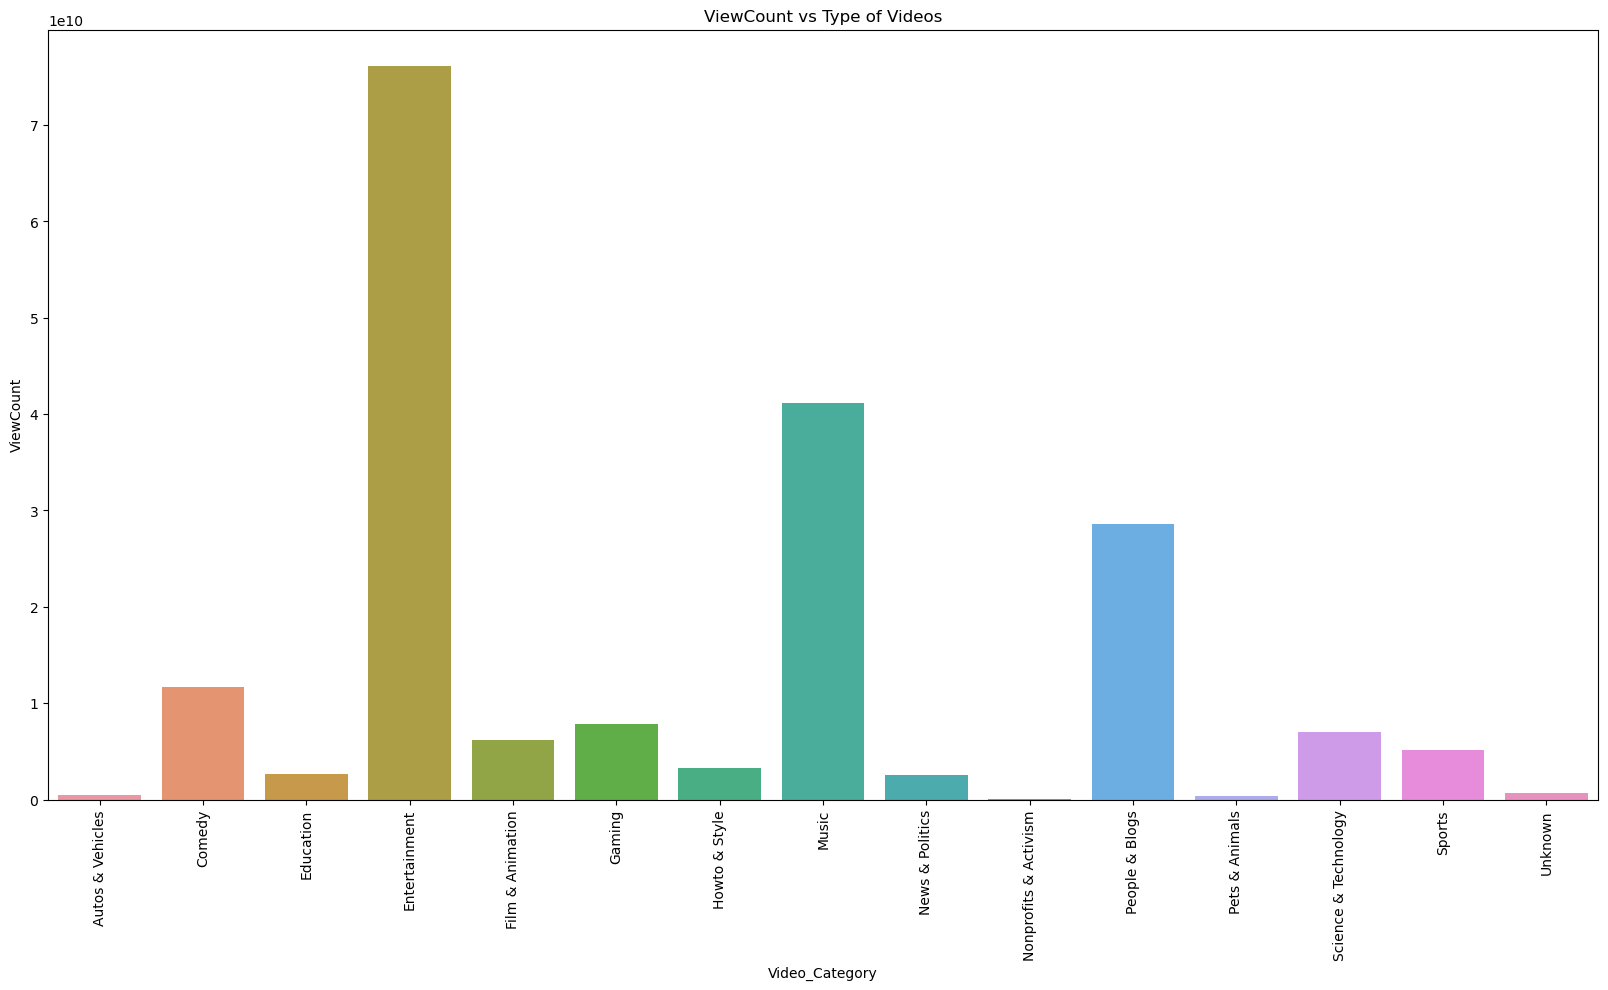

In [104]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("ViewCount vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.view_count)

# Add label for vertical axis
plt.ylabel("ViewCount")

Text(0, 0.5, 'Comments')

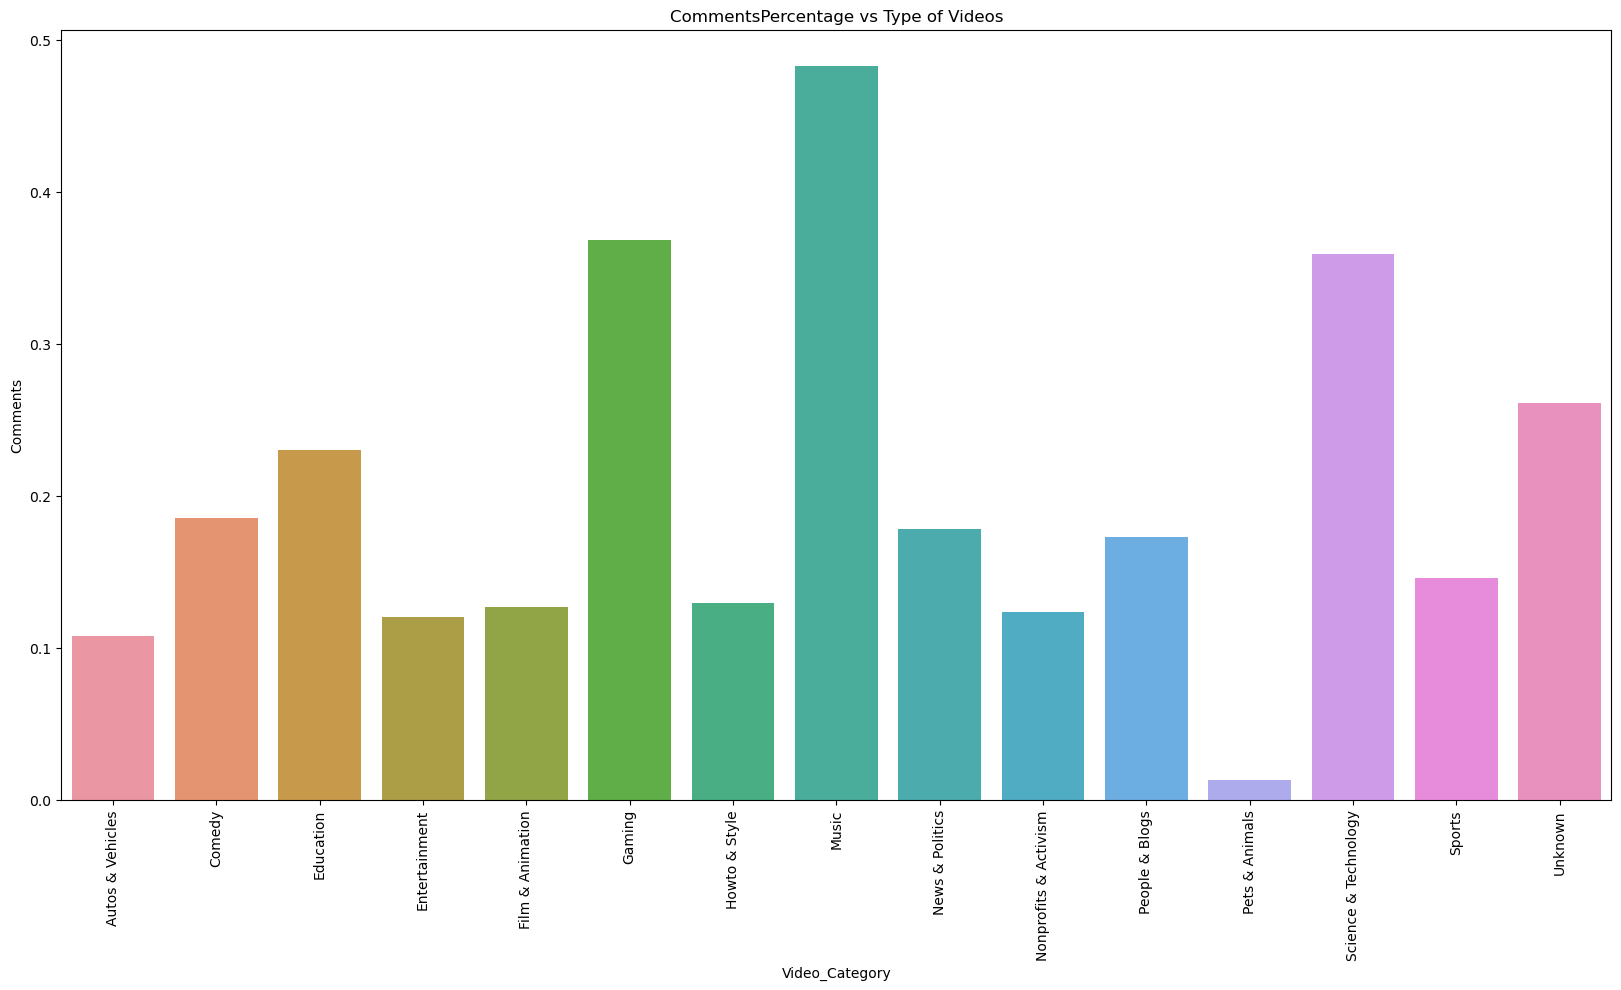

In [105]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.CommentsPercentage)

# Add label for vertical axis
plt.ylabel("Comments")

Text(0, 0.5, 'Dislikes')

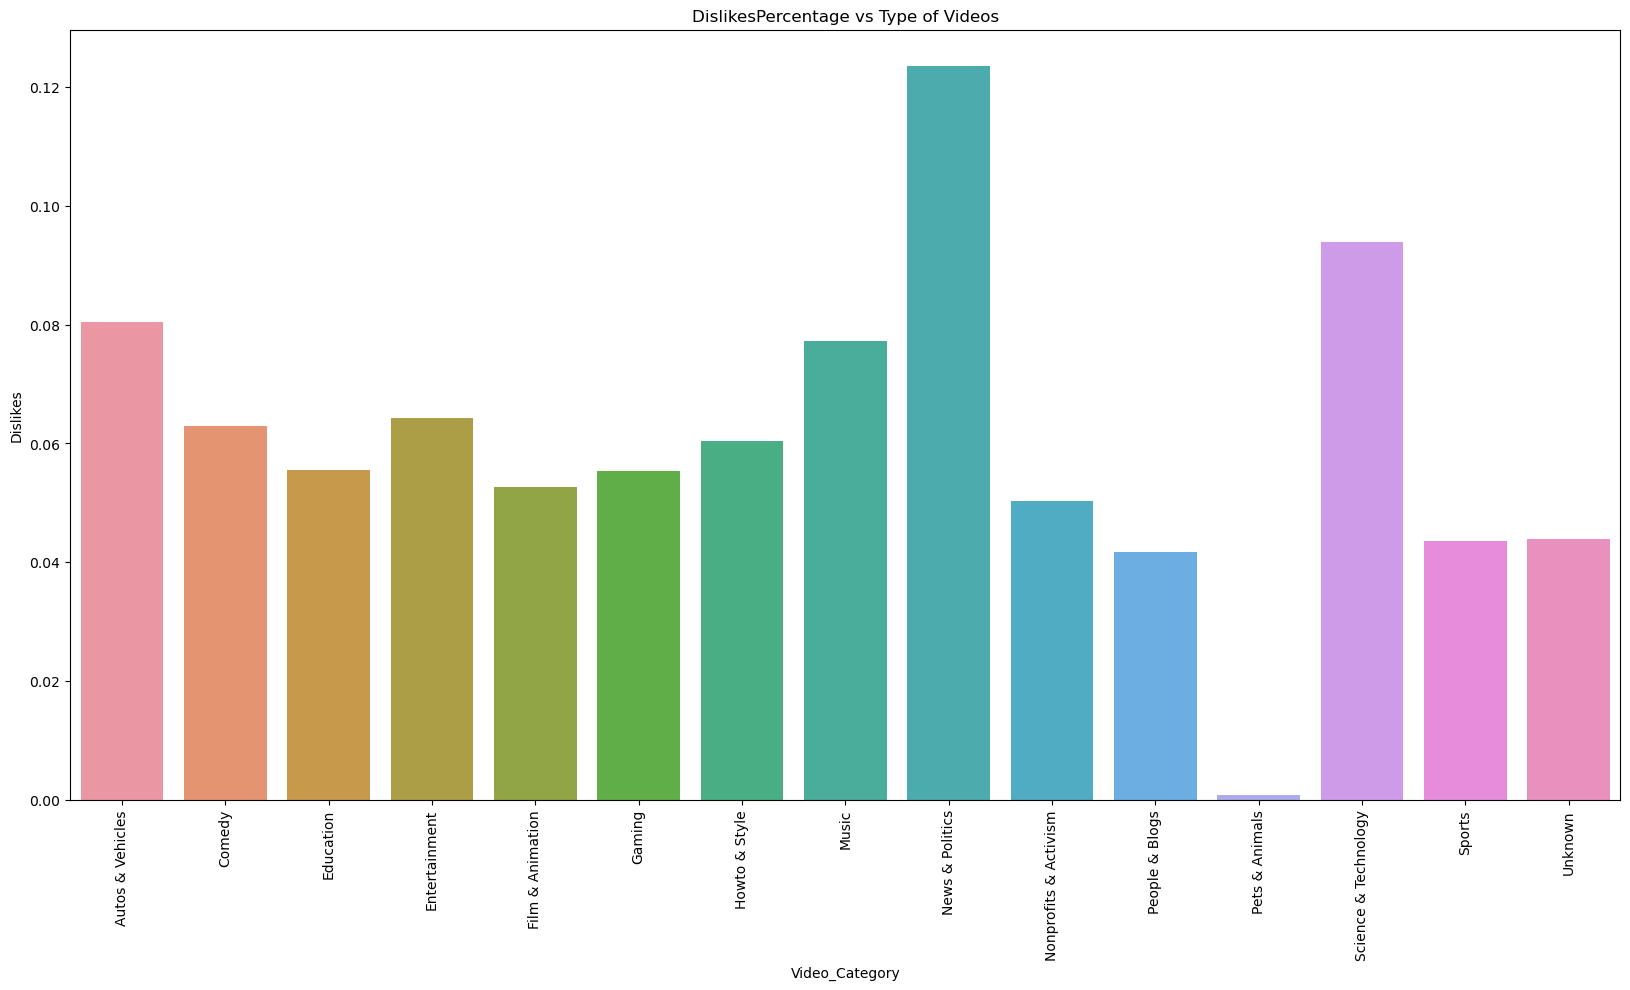

In [110]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.DislikesPercentage)

# Add label for vertical axis
plt.ylabel("Dislikes")

Text(0, 0.5, 'Likes')

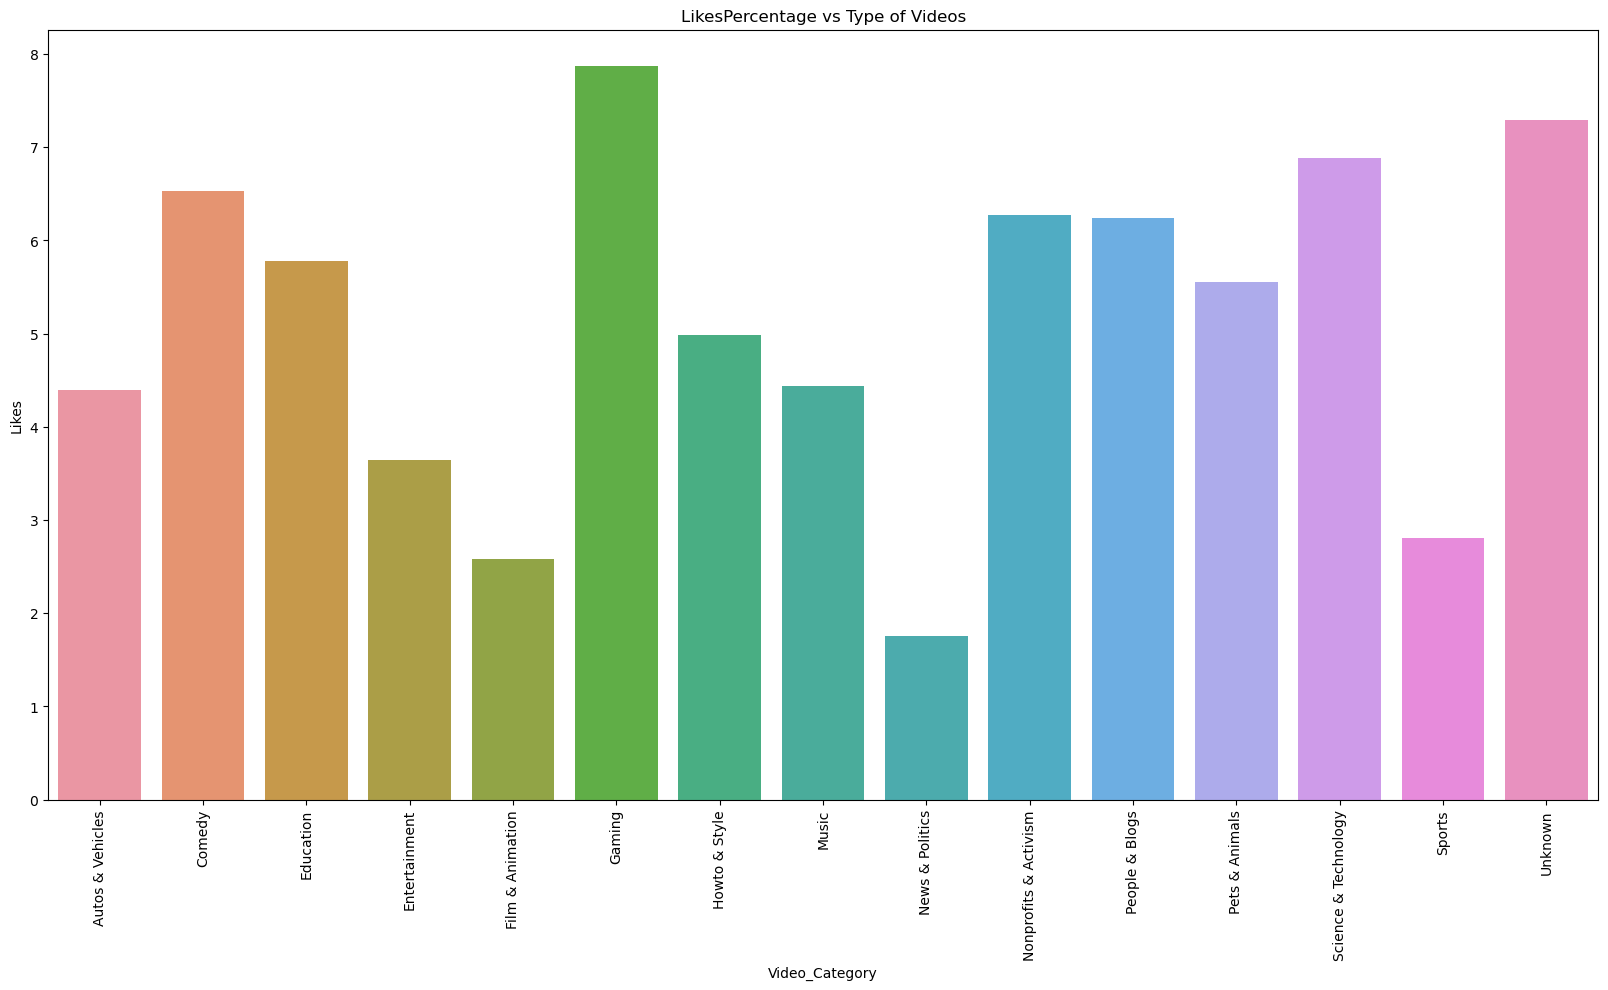

In [111]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

In [112]:
df_Channel = df_maxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
2361,Mentalist Anandhu,2481797,60083,0,1915
3198,Rohit Zinjurke,41820929,5439248,42455,159593
7,10TV Entertainment,4018630,67867,242,2218
2447,Mr GK,3450800,340624,0,4374
1519,Hairstyle Tutorial,1200683,22928,1885,58
3455,Shaan Geo,2127715,77472,166,7285
1048,Dimple's Kitchen,26027811,2207312,18388,88701
2966,Punjabi News Corner,210203,5465,237,666
371,Anushree Anchor,23818789,1059516,6994,39619
1443,Goku FF,126904,0,0,667


In [113]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3823,T-Series,5641807084,138353388,3847392,8883194
3651,Sourav Joshi Vlogs,4665938463,409969189,1032729,15700003
1497,HAR PAL GEO,4502809887,72900671,471755,2244635
4358,Vijay Television,4444495085,87784548,909236,4081307
2472,MrBeast,3775745475,206757848,566834,8203638
119,ARY Digital HD,3097663399,57210421,0,1675850
3636,Sony SAB,1957446906,30745542,709624,818056
3758,Sun TV,1800068242,49615889,260907,2486598
526,BLACKPINK,1771645947,154207358,1912398,19437816
4566,Zee Music Company,1744019943,43600075,2096196,3906131


Text(0, 0.5, 'Total Views')

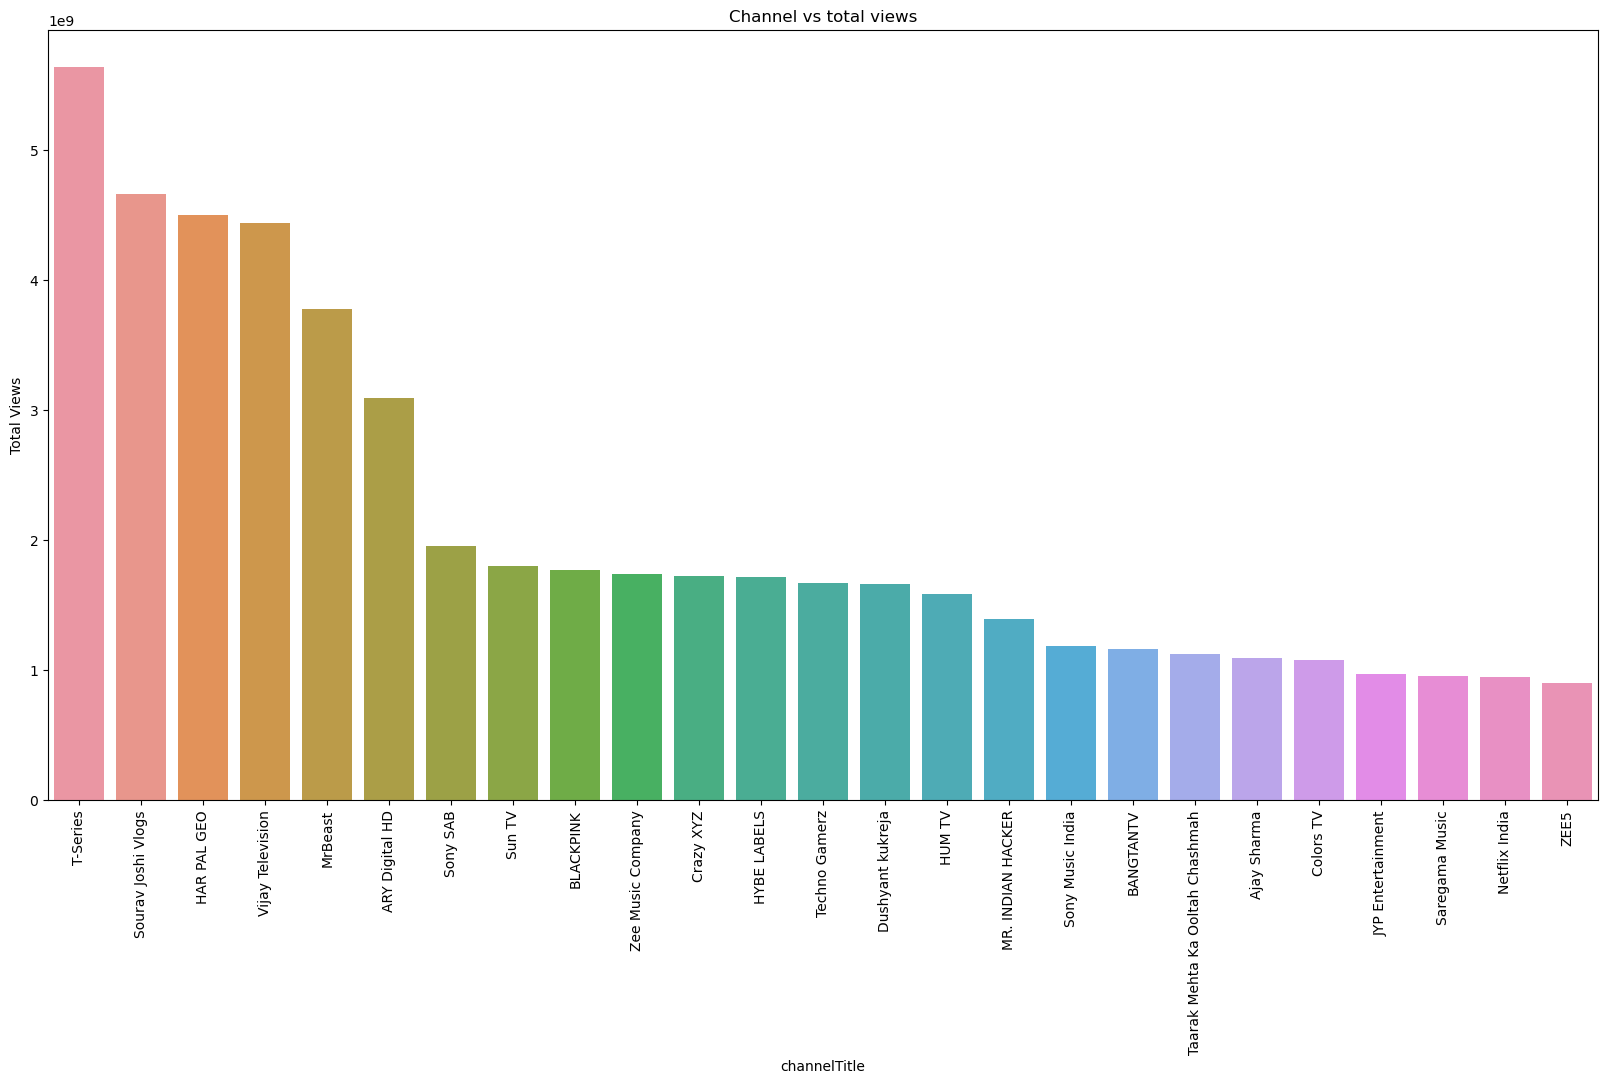

In [114]:
Channel_Views = df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.view_count)

# Add label for vertical axis
plt.ylabel("Total Views")

Text(0, 0.5, 'Total Likes')

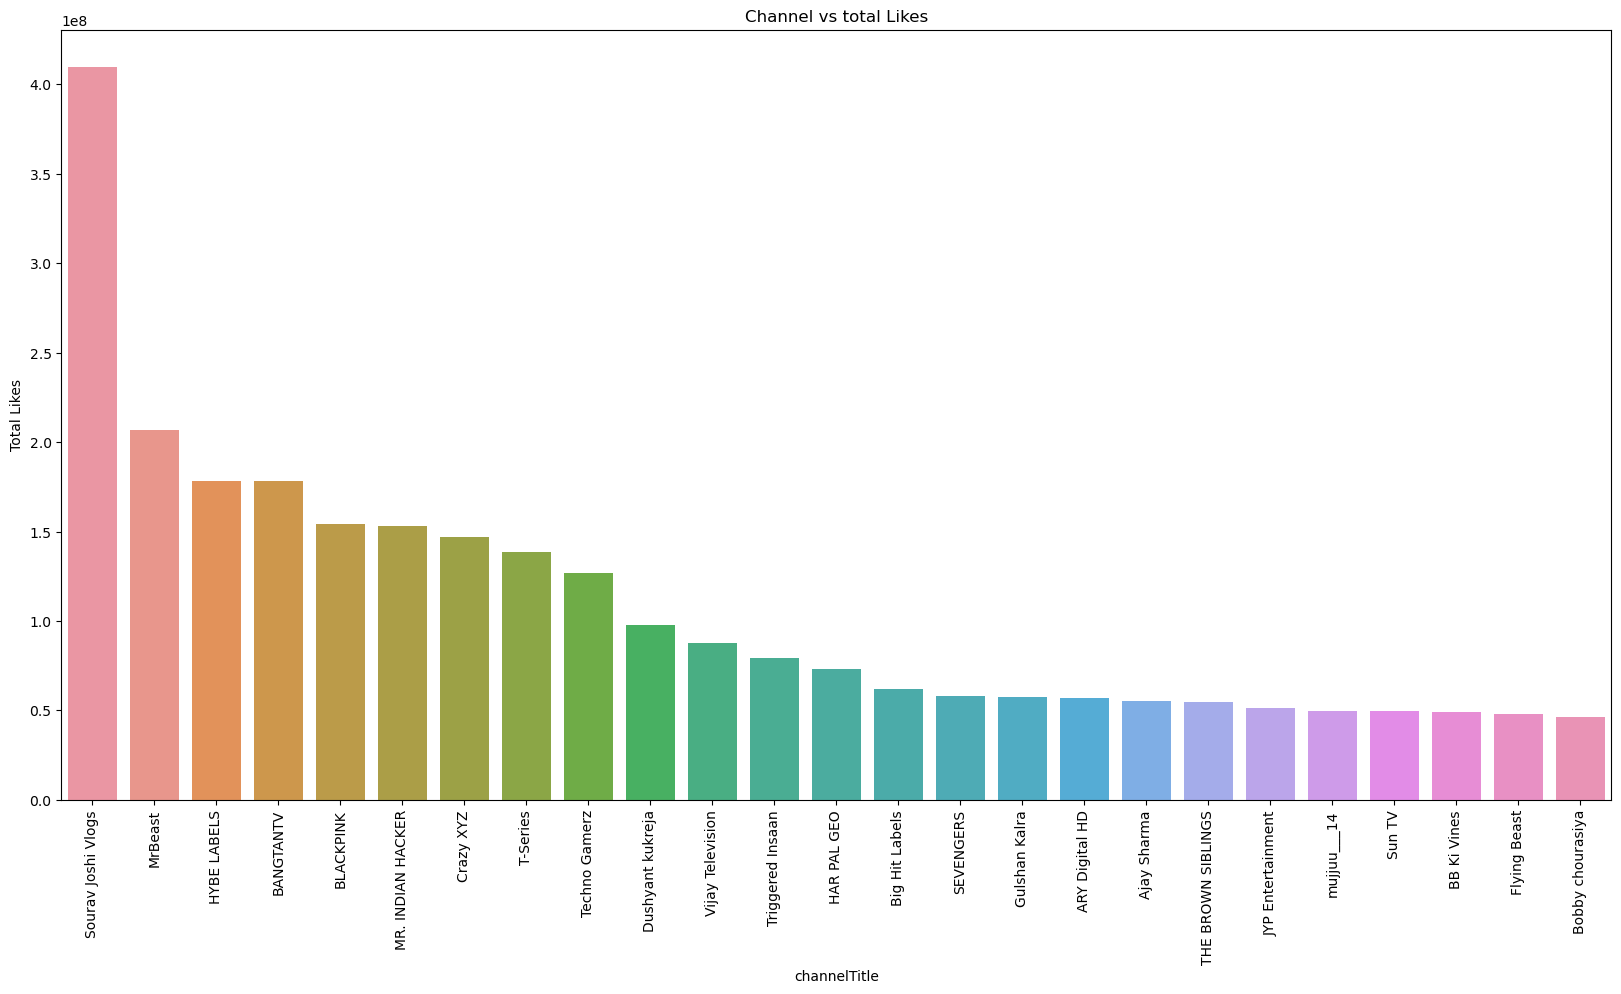

In [115]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")

Text(0, 0.5, 'Total Comments')

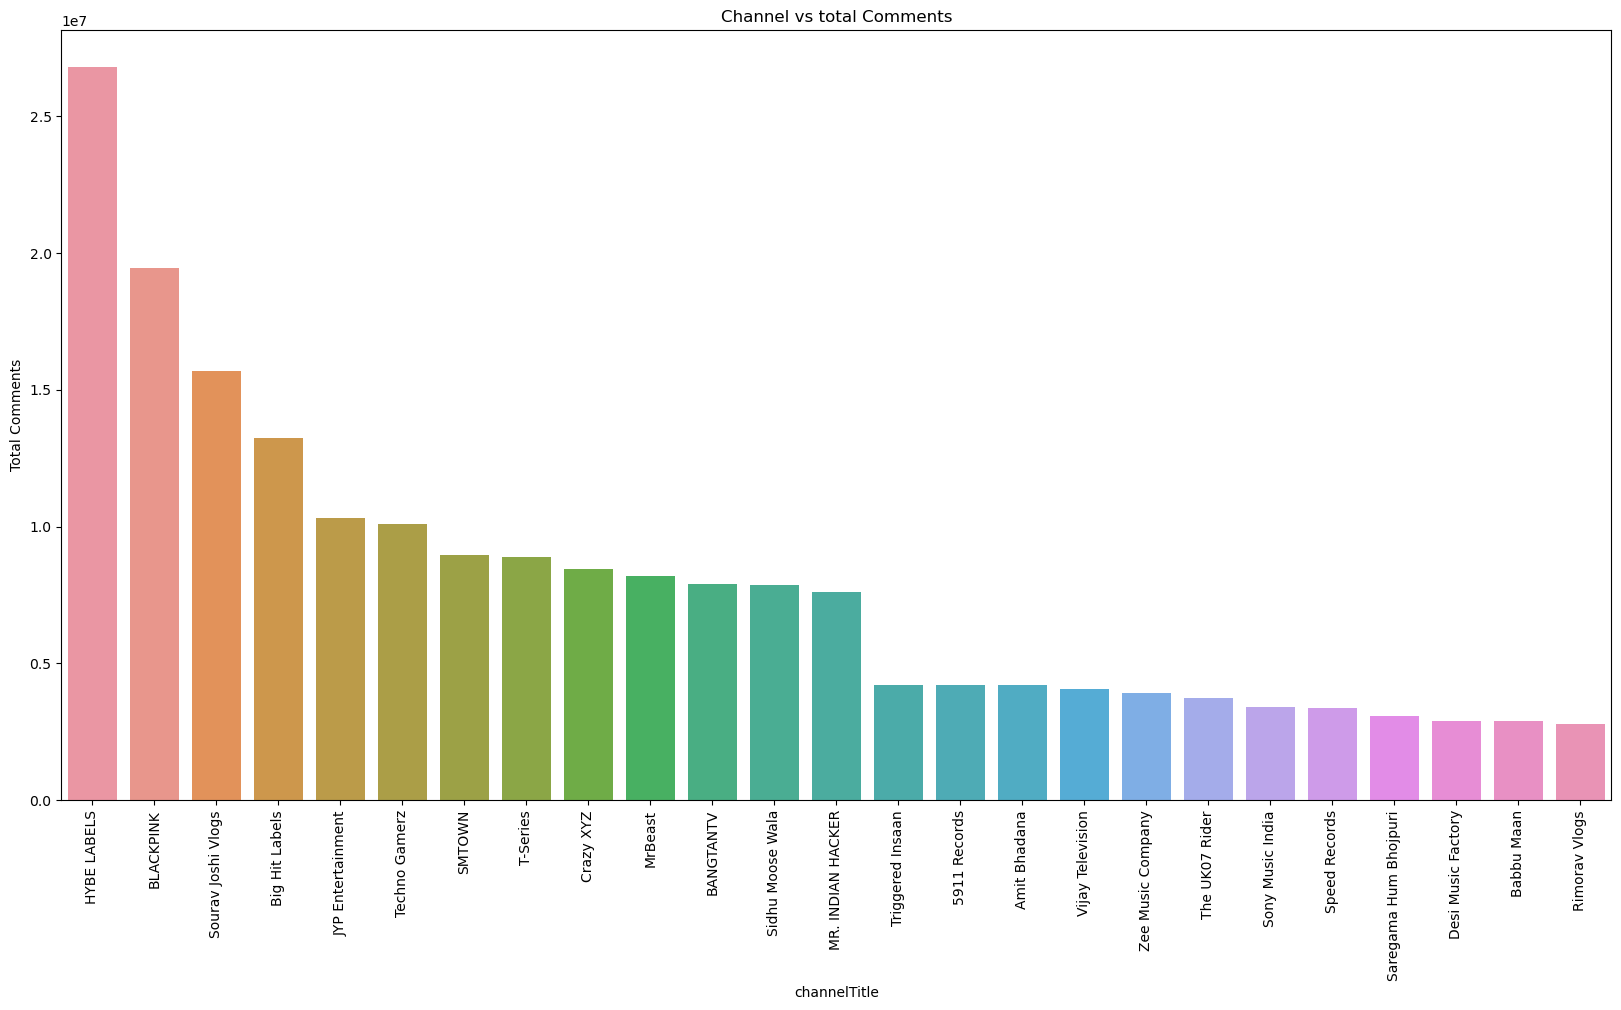

In [116]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

In [117]:
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

In [118]:
df_maxViews["times_in_trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,times_in_trending
30702,9b9MovPPewk,Kala Official Teaser | Tovino Thomas | Rohith ...,2021-01-21T12:30:29Z,Juvis Productions,22,2021-01-25T00:00:00Z,1386164,80893,1864,3290,People & Blogs,6
215822,m7-UGurGI6A,2 Bhai Badmash | Diler Kharkiya | Kehar Kharki...,2023-09-19T04:30:01Z,DIL Music,10,2023-09-22T00:00:00Z,105742,7808,0,1545,Music,3
91939,vMs5A6jVYXU,Maana Dil Da Hai Mera Hai Kasoor | Sad Love St...,2021-12-05T04:31:16Z,Maahi Queen,24,2021-12-08T00:00:00Z,832572,19600,691,521,Entertainment,3
20216,b7bZcytLAhc,PUBG Coming Very Soon... PUBG Mobile Indian Co...,2020-11-26T06:18:25Z,Technical Sagar,28,2020-11-28T00:00:00Z,212025,24007,1922,2374,Science & Technology,3
32386,5ZZFqYcwas4,Bakchod Joke #1 | Standup Comedy,2021-02-01T17:37:58Z,Samay Raina,22,2021-02-04T00:00:00Z,571618,60330,2643,2025,People & Blogs,3


In [119]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending=False).iloc[:25,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,times_in_trending
58680,y_RHQ4mBDKA,"Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...",2021-06-08T05:30:44Z,T-Series,10,2021-06-17T00:00:00Z,46351646,1585497,44771,77470,Music,19
56632,pYDdDIdiSFY,KFC Style Crispy Chicken Fry🍗 #Jamamasjid #del...,2021-06-02T07:25:15Z,INDIA EAT MANIA,24,2021-06-12T00:00:00Z,29970151,636668,43574,5711,Entertainment,18
56622,KVh4KtUSW3A,"Baarish Ban Jaana (Official Video) Payal Dev, ...",2021-06-03T05:30:20Z,VYRLOriginals,10,2021-06-12T00:00:00Z,46199357,984341,33052,110202,Music,18
54983,Hjj9nrjvpZo,She thought she pranked me 😂🤷‍♂️ #shorts,2021-05-28T09:30:01Z,Suyash Vlogs,24,2021-06-07T00:00:00Z,42645272,691428,60115,1764,Entertainment,17
54976,LtLJRNBHOKc,Online Parent Teacher Meeting | Ashish Chanchlani,2021-05-29T08:35:32Z,ashish chanchlani vines,23,2021-06-07T00:00:00Z,20645862,2311665,31993,110663,Comedy,17
56254,AzOvsmpQVKM,Jubin Nautiyal : Kabira (कबीर दोहे) | Raaj Aas...,2021-06-03T03:30:35Z,T-Series,10,2021-06-11T00:00:00Z,18970641,1363032,21272,80926,Music,16
56996,GbwpvjAEZv0,Great Khali's Instagram is The Funniest - Try ...,2021-06-05T07:00:02Z,Triggered Insaan,23,2021-06-13T00:00:00Z,10226184,1034148,28653,61954,Comedy,16
58637,nFjVlf2r9_Q,Badshah - Paani Paani | Jacqueline Fernandez |...,2021-06-09T06:30:27Z,Saregama Music,10,2021-06-17T00:00:00Z,76252340,1417028,153022,86156,Music,16
57399,oiBif8SefIg,LOCKDOWN WITH COUSIN ( Episode -2 ) || Rachit ...,2021-06-06T04:07:00Z,Rachit Rojha,24,2021-06-14T00:00:00Z,7987529,243058,19726,20730,Entertainment,16
55515,2OtgYcd83Qg,"Jagame Thandhiram | Trailer | Dhanush, Aishwar...",2021-06-01T04:30:00Z,Netflix India,24,2021-06-09T00:00:00Z,11209237,571223,11929,27549,Entertainment,16


Text(0, 0.5, 'no.of trending')

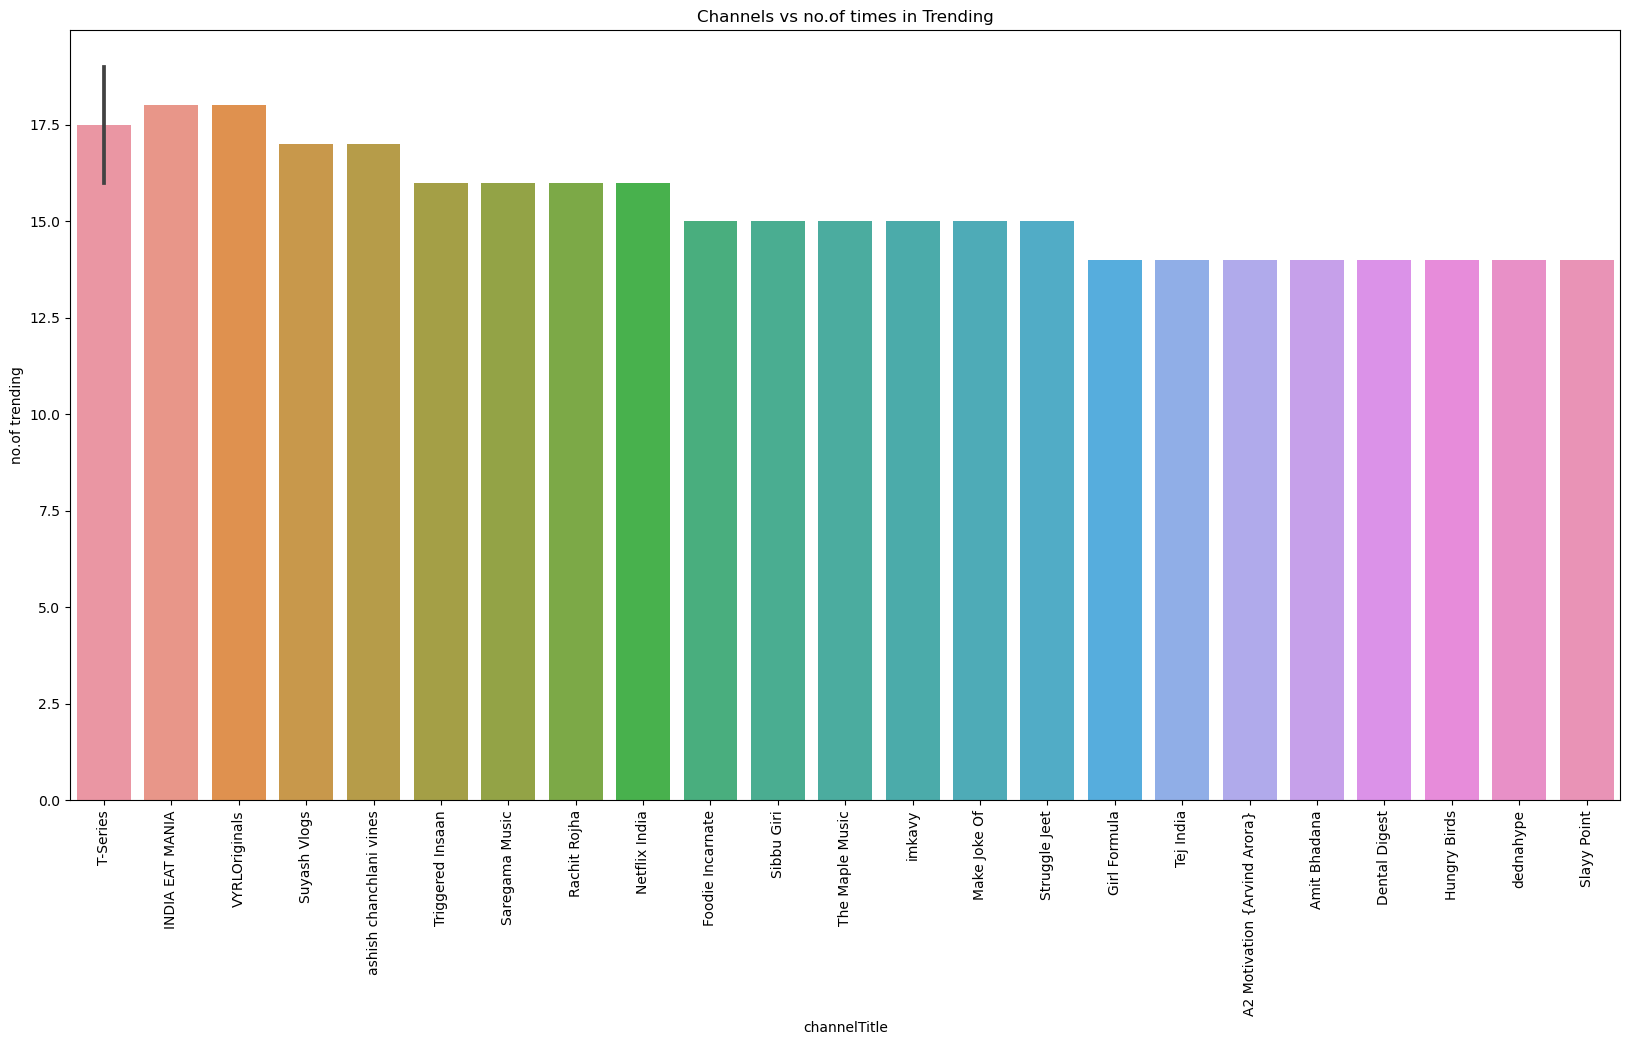

In [120]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

In [121]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending

,channelTitle,times_in_trending,Majority_Videos_Category_Type
4358,Vijay Television,3396,Entertainment
3651,Sourav Joshi Vlogs,2845,People & Blogs
3636,Sony SAB,2482,Entertainment
3758,Sun TV,2088,Entertainment
1497,HAR PAL GEO,1640,Entertainment
440,Asianet,1584,Entertainment
844,Colors TV,1532,Entertainment
877,Crazy XYZ,1447,Science & Technology
119,ARY Digital HD,1251,Entertainment
4543,ZEE5,1174,Entertainment


Text(0, 0.5, 'no.of times in trending')

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from c

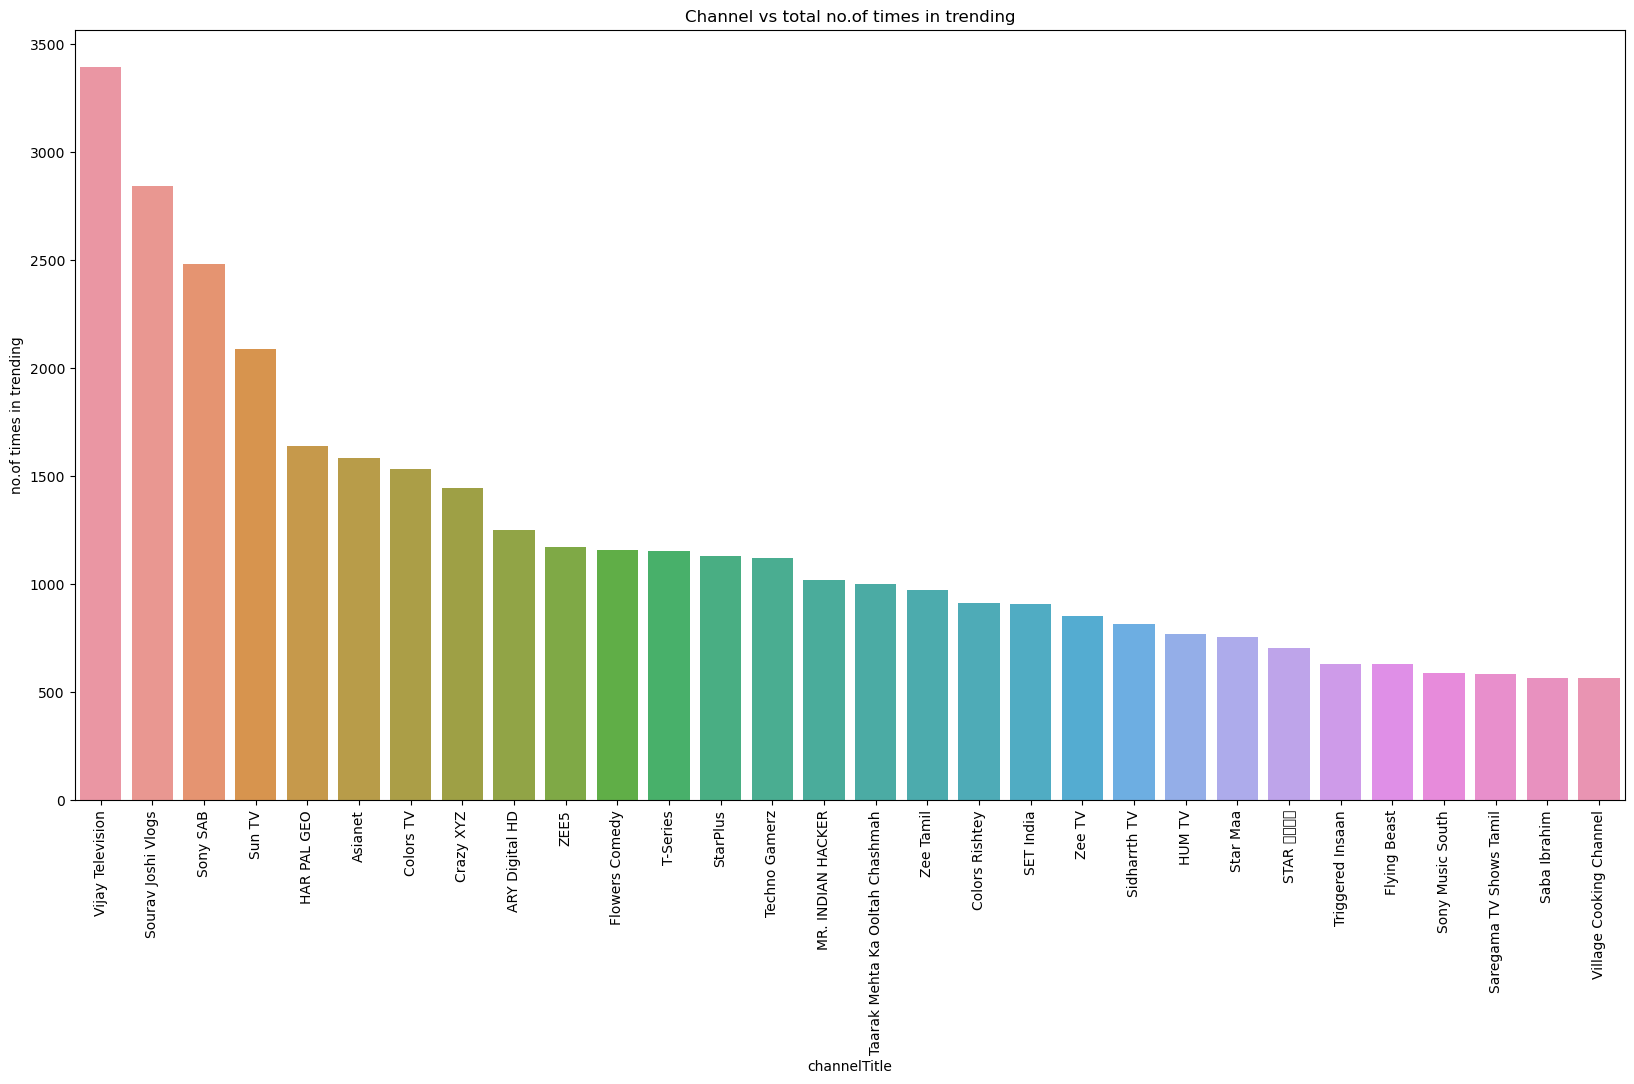

In [122]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Text(0, 0.5, 'no.of times in trending')

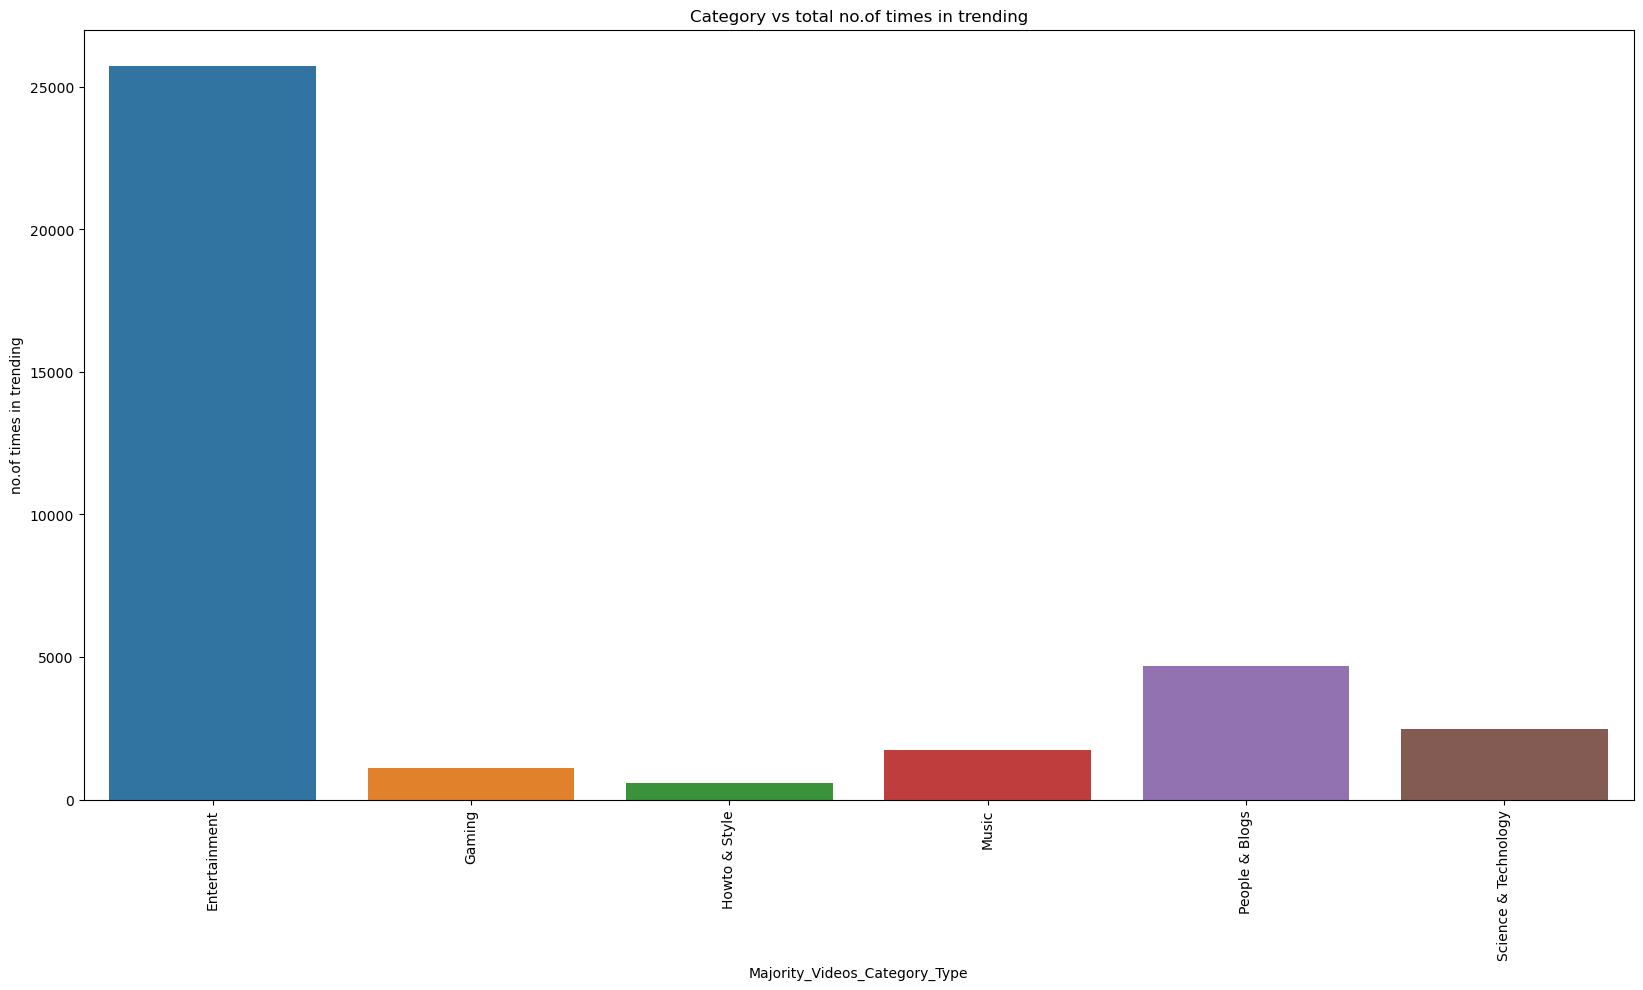

In [123]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

In [124]:
pd.Timestamp(df_minViews.trending_date[1])

Timestamp('2020-08-12 00:00:00+0000', tz='UTC')

In [125]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0])
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
124479,ucn1fIoIR_o,MI vs DC Screening at the RCB Bio Bubble | IPL...,2022-05-22T03:34:59Z,Royal Challengers Bangalore,17,2022-05-22T00:00:00Z,2631887,286006,0,13508,Sports,2022-05-22 00:00:00+00:00,2022-05-22 03:34:59+00:00,0
150101,nudV5ZTxJI8,tHiS dEvICe hELpS YOu eFfoRtLeSsLy tYPe liKE tHIs,2022-09-26T22:10:34Z,Unnecessary Inventions,24,2022-09-28T00:00:00Z,1334756,85384,0,1019,Entertainment,2022-09-28 00:00:00+00:00,2022-09-26 22:10:34+00:00,1
11729,6dpqblE6Es8,Naagin 5 | नागिन 5 | Ep. 18 | Veer To Kill Jay?,2020-10-11T03:56:51Z,Colors TV,24,2020-10-12T00:00:00Z,860553,7507,535,433,Entertainment,2020-10-12 00:00:00+00:00,2020-10-11 03:56:51+00:00,0
220056,rUGZ9NQVkpM,Uppum Mulakum 2 | Flowers | EP# 365,2023-10-17T16:00:41Z,Flowers Comedy,24,2023-10-18T00:00:00Z,876456,30454,0,1486,Entertainment,2023-10-18 00:00:00+00:00,2023-10-17 16:00:41+00:00,0
58718,BBRHTOEwFzg,RAMPAGE NEW DAWN EVENT FREEFIRE | FREEFIRE NEW...,2021-06-18T02:43:54Z,SA GAMING,20,2021-06-19T00:00:00Z,483684,24798,1728,1324,Gaming,2021-06-19 00:00:00+00:00,2021-06-18 02:43:54+00:00,0
15371,hOiRkAF8IjE,Just Tamil Cinema things || Poornima Ravi || ...,2020-10-31T13:23:12Z,Araathi,24,2020-11-01T00:00:00Z,627599,39605,2261,3365,Entertainment,2020-11-01 00:00:00+00:00,2020-10-31 13:23:12+00:00,0
36145,ystQh9VH4Po,Barrister Babu | बैरिस्टर बाबू | Episode 204 &...,2021-02-24T07:30:04Z,Colors TV,24,2021-02-25T00:00:00Z,1291373,19289,860,396,Entertainment,2021-02-25 00:00:00+00:00,2021-02-24 07:30:04+00:00,0
239438,a6rWJsFiKgQ,"Malliswari Movie Scenes | Venkatesh, Katrina K...",2024-02-05T07:42:10Z,SP Shorts,23,2024-02-06T00:00:00Z,119971,688,0,1,Comedy,2024-02-06 00:00:00+00:00,2024-02-05 07:42:10+00:00,0
125059,Gb31VDCmryY,Aisa Mat Karo Please 🙁 Stop it,2022-05-25T02:30:03Z,Sourav Joshi Vlogs,22,2022-05-25T00:00:00Z,3639859,432595,0,12284,People & Blogs,2022-05-25 00:00:00+00:00,2022-05-25 02:30:03+00:00,0
1341,JfcxsBB5noQ,एक बार हरी मिर्च का अचार ऐसे जरूर बनाना सब्जी ...,2020-08-18T07:53:30Z,Reena Kitchen point,26,2020-08-19T00:00:00Z,542470,8880,629,352,Howto & Style,2020-08-19 00:00:00+00:00,2020-08-18 07:53:30+00:00,0


Text(0, 0.5, 'Avg no.of days')

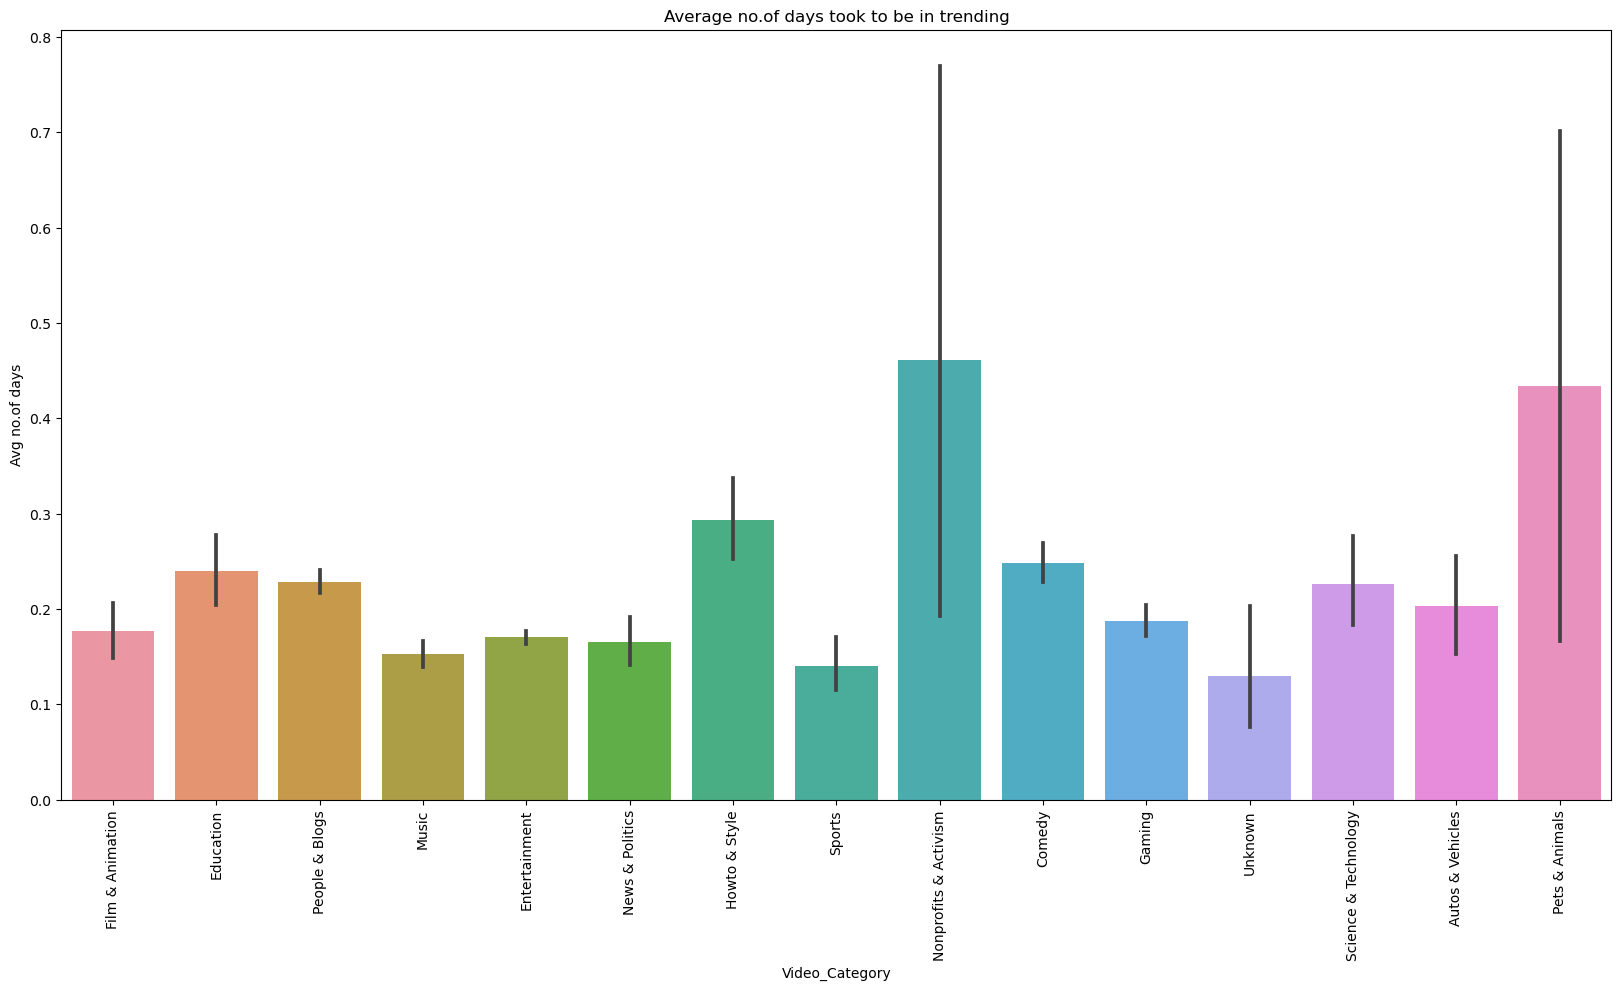

In [126]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews.DaysTakenToBeOnTrending)
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days")